In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score, explained_variance_score

In [2]:
## Define a function to display evaluation matricsm 

In [59]:
def display_evaluation_matrices(y_true, y_predict, name):
    ev  = explained_variance_score(y_true, y_predict)
    mse = mean_squared_error(y_true, y_predict)
    mae = mean_absolute_error(y_true, y_predict)
    r_square_score = r2_score(y_true, y_predict)

    print(f"{name} Prediction Result \n")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"R2 value: {r_square_score:.2f}")
    print(f"Explained variance score: {round(ev,2)}\n")

## Create a simple dataset having a single feature

In [33]:
noise = 1
np.random.seed(42)
X = 2 * np.random.rand(1000,1)
y = 4 + 3 * X + noise*np.random.randn(1000,1)
y_ideal = 4 + 3 * X

# add outliers
y_outlier = pd.Series(y.reshape(-1).copy())


# identify indices where the feature variable X is greater than a certain threshold
threshold = 1.5
outlier_indices = np.where(X.flatten()> threshold)[0]

# Add outliers at random locations within the specified portion
num_outliers = 5 # number of outliers to add
selected_indices = np.random.choice(outlier_indices, num_outliers, replace = False)


# modify the target values at these indices to create outliers
y_outlier[selected_indices] +=np.random.uniform(50,100, num_outliers)

In [12]:
outlier_indices

array([  1,   7,  11,  12,  25,  33,  34,  35,  43,  50,  51,  52,  53,
        55,  62,  67,  69,  70,  73,  76,  80,  88,  92,  94, 104, 107,
       112, 113, 115, 116, 118, 120, 121, 126, 127, 134, 139, 140, 150,
       154, 157, 165, 178, 182, 183, 186, 191, 192, 197, 198, 199, 203,
       219, 226, 228, 230, 240, 241, 242, 245, 247, 248, 249, 252, 256,
       261, 264, 270, 271, 272, 273, 276, 279, 280, 292, 296, 305, 308,
       313, 314, 324, 331, 336, 351, 358, 364, 366, 367, 376, 378, 383,
       385, 388, 389, 390, 393, 395, 396, 398, 399, 401, 403, 405, 408,
       411, 412, 419, 420, 421, 427, 431, 437, 441, 444, 445, 446, 447,
       450, 453, 464, 467, 469, 471, 473, 475, 478, 485, 488, 489, 498,
       499, 503, 506, 507, 508, 512, 513, 517, 518, 522, 523, 524, 529,
       530, 531, 532, 534, 535, 536, 540, 549, 551, 554, 558, 568, 571,
       574, 575, 577, 581, 594, 611, 614, 615, 618, 631, 645, 648, 661,
       671, 675, 678, 679, 680, 684, 688, 705, 707, 710, 715, 71

In [43]:
#X.flatten()

In [15]:
y_outlier

0      6.247241
1      9.704286
2      8.391964
3      7.591951
4      4.936112
         ...   
995    4.549492
996    9.503881
997    4.820912
998    9.701424
999    6.676035
Length: 1000, dtype: float64

In [16]:
b = np.random.uniform(50,100, 5)

## Plot the data with outliers and the ideal fit line

In [19]:
X.shape, y.shape, y_outlier.shape

((1000, 1), (1000, 1), (1000,))

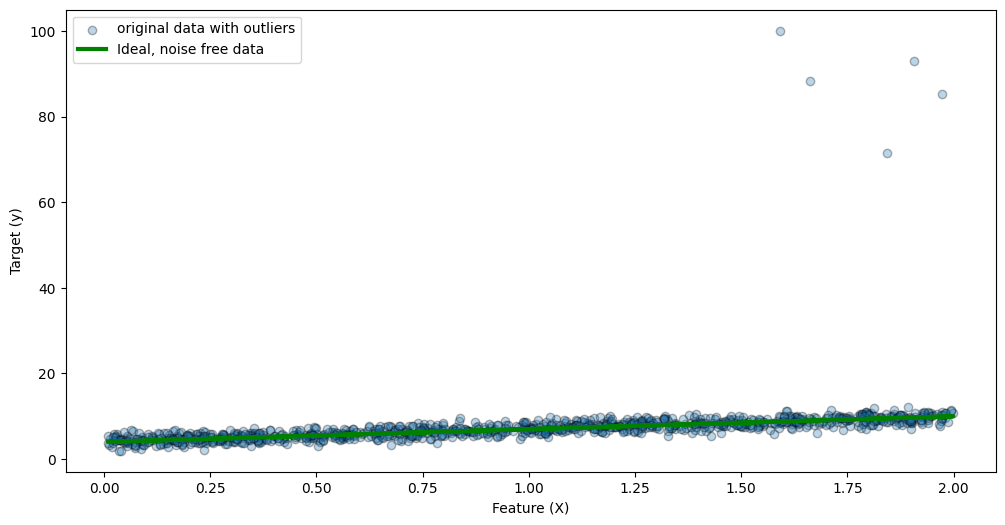

In [35]:
plt.figure(figsize = (12,6))
plt.scatter(X, y_outlier,alpha = 0.3,ec = 'k' , label = 'original data with outliers')
plt.plot(X,y_ideal, linewidth = 3 , color = 'g', label = 'Ideal, noise free data')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('')
plt.legend()
plt.show()

## Plot the data without the outliers and the ideal fit line

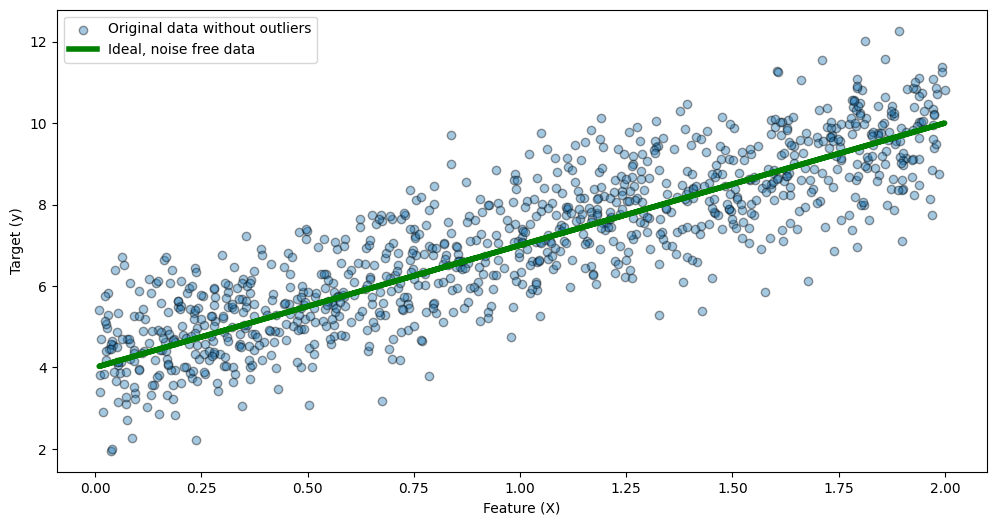

In [36]:
plt.figure(figsize = (12,6))

# Scatter plot of the original data with outliers
plt.scatter(X,y, alpha = 0.4, ec = 'k', label = 'Original data without outliers')
plt.plot(X, y_ideal, linewidth =4, color = 'g', label = 'Ideal, noise free data')

plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('')
plt.legend()
plt.show()


## Fit ordinary, ridge, and lasso regression models and use them to make predictions on the original, outlier- free data

In [37]:
# A simple linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X, y_outlier)
lin_reg_pred = lin_reg.predict(X)


# A ridge regression model
l1_ridge = Ridge(alpha = 1)
l1_ridge.fit(X,y_outlier)
l1_ridge_pred = l1_ridge.predict(X)

# A lasso regression model
l2_lasso = Lasso(alpha = 0.2)
l2_lasso.fit(X,y_outlier)
l2_lasso_pred = l2_lasso.predict(X)

## Plotting the result

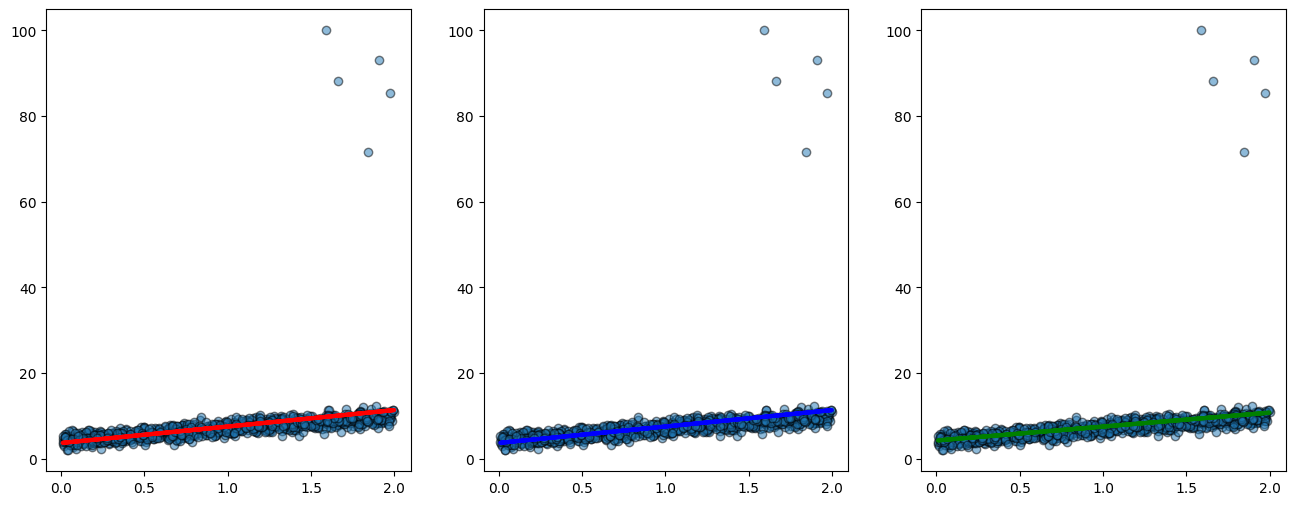

In [53]:
plt.figure(figsize = (16,6))
plt.subplot(1,3,1)
plt.scatter(X, y_outlier, alpha = 0.5, ec = 'k')
plt.plot(X, lin_reg_pred, c = 'red',linewidth =3 )
plt.subplot(1,3,2)
plt.scatter(X, y_outlier, alpha = 0.5, ec = 'k')
plt.plot(X, l1_ridge_pred, c = 'blue',linewidth =3 )
plt.subplot(1,3,3)
plt.scatter(X, y_outlier, alpha = 0.5, ec = 'k')
plt.plot(X, l2_lasso_pred, c = 'green',linewidth =3 )

plt.show()

In [60]:
display_evaluation_matrices(y, lin_reg_pred, 'Ordinary')
display_evaluation_matrices(y, l1_ridge_pred, 'Ridge')
display_evaluation_matrices(y, l2_lasso_pred, 'Lasso')

Ordinary Prediction Result 

Mean Squared Error: 1.42
Mean Absolute Error: 0.95
R2 value: 0.64
Explained variance score: 0.67

Ridge Prediction Result 

Mean Squared Error: 1.41
Mean Absolute Error: 0.94
R2 value: 0.64
Explained variance score: 0.68

Lasso Prediction Result 

Mean Squared Error: 1.17
Mean Absolute Error: 0.86
R2 value: 0.70
Explained variance score: 0.74



## Create a high dimensional synthetic dataset with a small number of informative features using make_regression

The output of `make_regression` is generated by applying a random linear regression model based on `n_informative` nonzero regressors and some adjustable gaussian noise.
Along with the features and the target vairable, the regression model coefficients can also be obtained from the output.

We'll split the data into training and testing sets, and also split the ideal predictions, which is a line based on the linear regression model.


In [64]:
from sklearn.datasets import make_regression

X, y, ideal_coef = make_regression(n_samples = 100, n_features = 100, n_informative = 10, noise = 10, random_state=42, coef = True)


# Get the ideal predictions based on the informative coefficients used in the regression model
ideal_predictions = X @ ideal_coef

X_train, X_test, y_train, y_test, ideal_train, ideal_test = train_test_split(X, y, ideal_predictions, test_size=0.3, random_state=42)

In [65]:
lasso = Lasso(alpha=0.1)
ridge = Ridge(alpha=1.0)
linear = LinearRegression()

# Fit the models
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)
linear.fit(X_train, y_train)

# Predict on the test set
y_pred_linear = linear.predict(X_test)
y_pred_ridge = ridge.predict(X_test)
y_pred_lasso = lasso.predict(X_test)

In [66]:
display_evaluation_matrices(y_test, y_pred_linear, 'Ordinary')
display_evaluation_matrices(y_test, y_pred_ridge, 'Ridge')
display_evaluation_matrices(y_test, y_pred_lasso, 'Lasso')

Ordinary Prediction Result 

Mean Squared Error: 9844.27
Mean Absolute Error: 77.74
R2 value: 0.40
Explained variance score: 0.44

Ridge Prediction Result 

Mean Squared Error: 9744.47
Mean Absolute Error: 76.96
R2 value: 0.41
Explained variance score: 0.44

Lasso Prediction Result 

Mean Squared Error: 304.64
Mean Absolute Error: 13.89
R2 value: 0.98
Explained variance score: 0.98



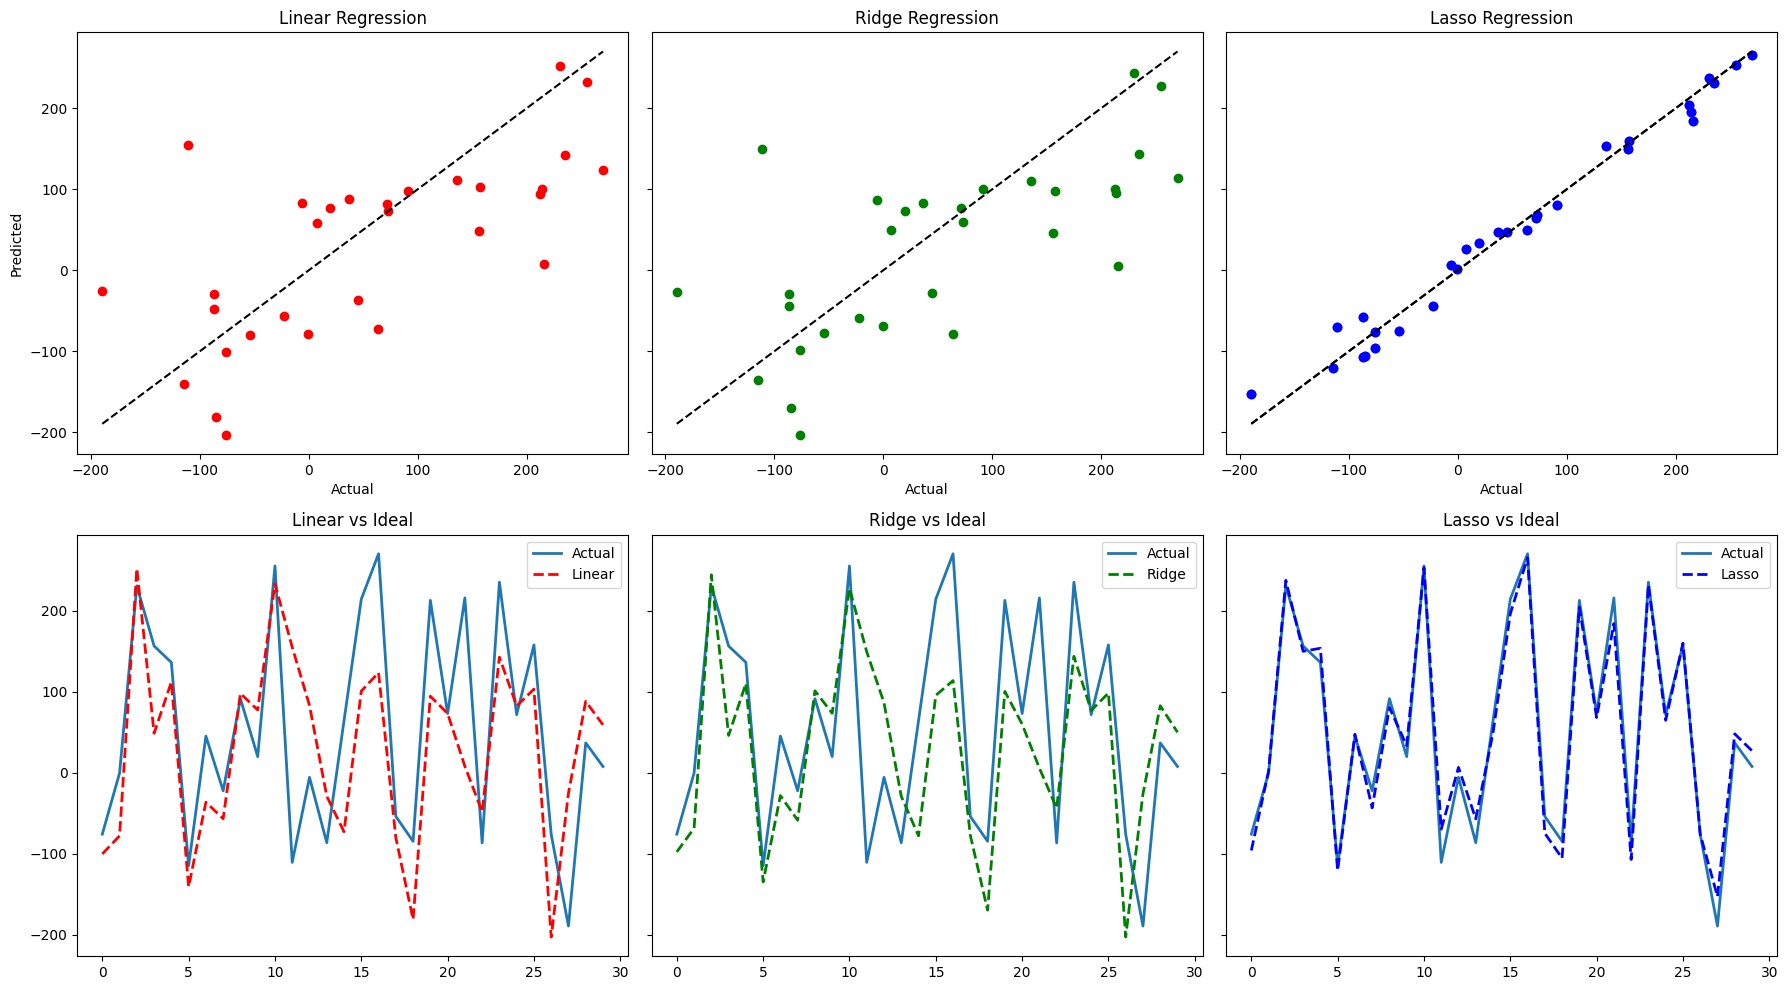

In [68]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharey=True)

axes[0,0].scatter(y_test, y_pred_linear, color="red", label="Linear")
axes[0,0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
axes[0,0].set_title("Linear Regression")
axes[0,0].set_xlabel("Actual",)
axes[0,0].set_ylabel("Predicted",)

axes[0,2].scatter(y_test, y_pred_lasso, color="blue", label="Lasso")
axes[0,2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
axes[0,2].set_title("Lasso Regression",)
axes[0,2].set_xlabel("Actual",)

axes[0,1].scatter(y_test, y_pred_ridge, color="green", label="Ridge")
axes[0,1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
axes[0,1].set_title("Ridge Regression",)
axes[0,1].set_xlabel("Actual",)

axes[0,2].scatter(y_test, y_pred_lasso, color="blue", label="Lasso")
axes[0,2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
axes[0,2].set_title("Lasso Regression",)
axes[0,2].set_xlabel("Actual",)


# Line plots for predictions compared to actual and ideal predictions
axes[1,0].plot(y_test, label="Actual", lw=2)
axes[1,0].plot(y_pred_linear, '--', lw=2, color='red', label="Linear")
axes[1,0].set_title("Linear vs Ideal",)
axes[1,0].legend()
 
axes[1,1].plot(y_test, label="Actual", lw=2)
# axes[1,1].plot(ideal_test, '--', label="Ideal", lw=2, color="purple")
axes[1,1].plot(y_pred_ridge, '--', lw=2, color='green', label="Ridge")
axes[1,1].set_title("Ridge vs Ideal",)
axes[1,1].legend()
 
axes[1,2].plot(y_test, label="Actual", lw=2)
axes[1,2].plot(y_pred_lasso, '--', lw=2, color='blue', label="Lasso")
axes[1,2].set_title("Lasso vs Ideal",)
axes[1,2].legend()
 
plt.tight_layout()
plt.show()

In [ ]:
fig, axes = plt.subplots(2, 3, figsize = (18, 10), sharey = True)

axes[0,0].scatter(y_test, y_pred_)

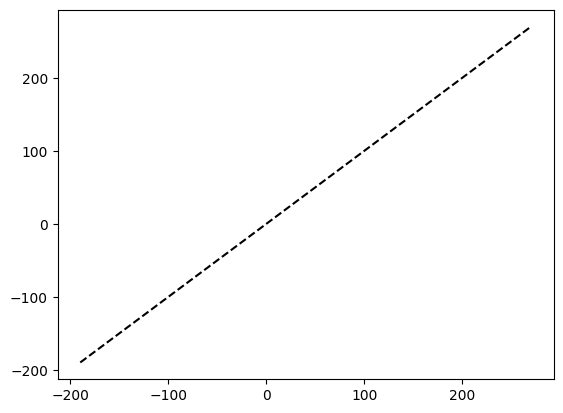

In [74]:
plt.plot([-189.57320491845982, 270.12116661618364], [-189.57320491845982, 270.12116661618364], 'k--')
plt.show()

In [73]:
y_test.min(), y_test.max()

(-189.57320491845982, 270.12116661618364)

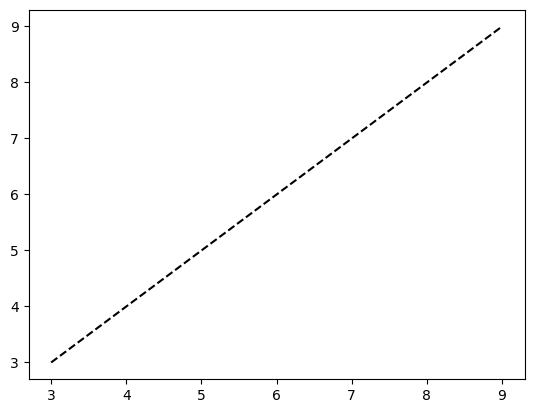

In [75]:
plt.plot([3,9], [3,9], 'k--')
plt.show()

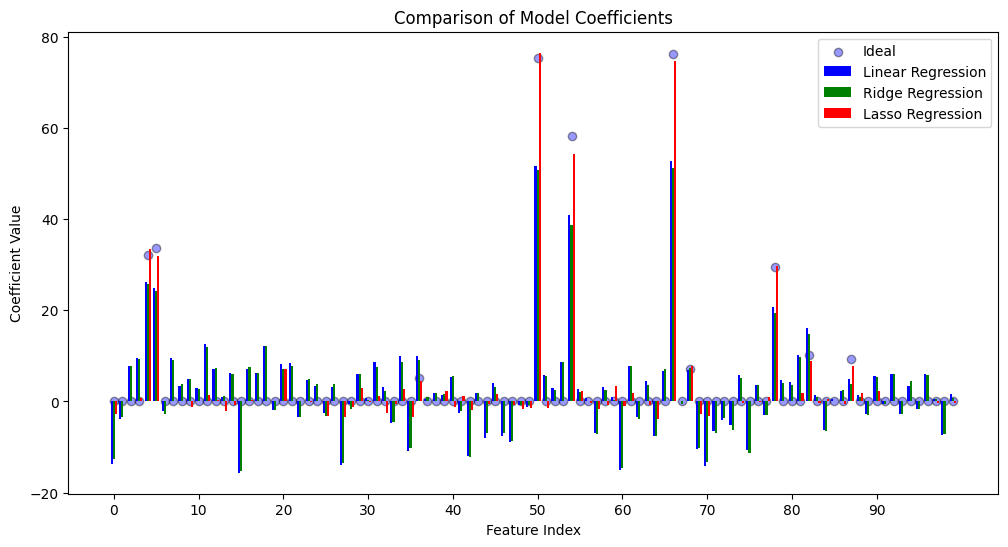

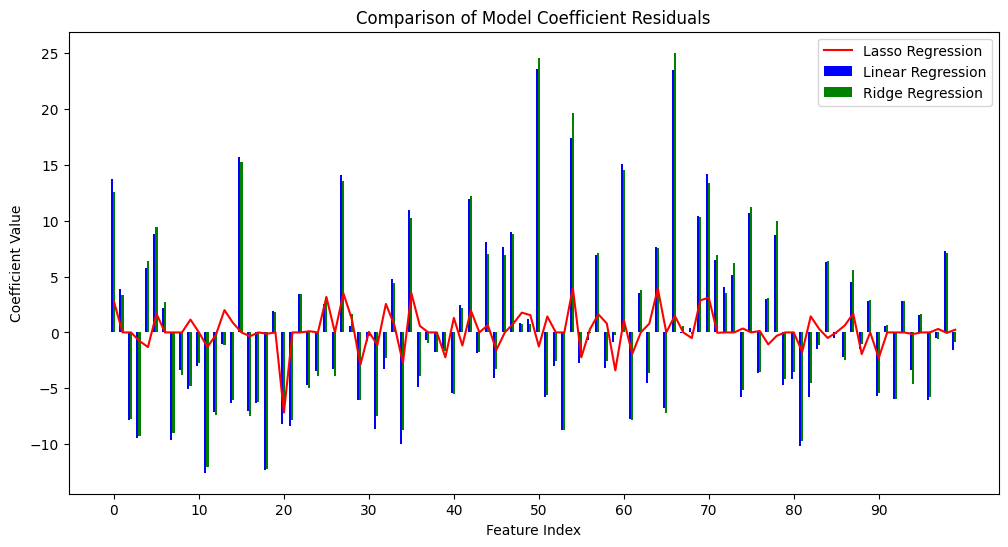

In [84]:
linear_coeff = linear.coef_
ridge_coeff = ridge.coef_
lasso_coeff = lasso.coef_

# plot the coefficients
x_axis = np.arange(len(linear_coeff))
x_labels = np.arange(min(x_axis), max(x_axis), 10)
plt.figure(figsize = (12,6))

plt.scatter(x_axis, ideal_coef, label = 'Ideal', color = 'blue', ec = 'k', alpha = 0.4)
plt.bar(x_axis-0.25, linear_coeff,width = 0.25, label ='Linear Regression', color = 'blue')
plt.bar(x_axis, ridge_coeff, width=0.25, label='Ridge Regression', color='green')
plt.bar(x_axis + 0.25, lasso_coeff, width=0.25, label='Lasso Regression', color='red')

plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Comparison of Model Coefficients')
plt.xticks(x_labels)
plt.legend()
plt.show()


# Plot the coefficient residuals
x_axis = np.arange(len(linear_coeff))

plt.figure(figsize=(12, 6))

plt.bar(x_axis - 0.25, ideal_coef - linear_coeff, width=0.25, label='Linear Regression', color='blue')
plt.bar(x_axis, ideal_coef - ridge_coeff, width=0.25, label='Ridge Regression', color='green')
# plt.bar(x_axis + 0.25, ideal_coef - lasso_coeff, width=0.25, label='Lasso Regression', color='red')
plt.plot(x_axis, ideal_coef - lasso_coeff, label='Lasso Regression', color='red')

plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Comparison of Model Coefficient Residuals')
plt.xticks(x_labels)
plt.legend()
plt.show()

## Use lasso to select the most important features and compare 

In [85]:
threshold = 5

# Create a dataframe containing the lasso model and ideal coeff

feature_importance_df = pd.DataFrame(
    {
        'Lasso Coefficient': lasso_coeff,
        'Ideal Coefficient': ideal_coef
    }
)

feature_importance_df['Feature Selected'] = feature_importance_df['Lasso Coefficient'].abs() > threshold


print("Features Identified as Important by Lasso:")
display(feature_importance_df[feature_importance_df['Feature Selected']])

print("\nNonzero Ideal Coefficient Indices")
display(feature_importance_df[feature_importance_df['Ideal Coefficient']>0])



Features Identified as Important by Lasso:


,Lasso Coefficient,Ideal Coefficient,Feature Selected
4,33.435088,32.125517,True
5,32.014793,33.692687,True
20,7.163636,0.000000,True
50,76.576829,75.319970,True
54,54.306360,58.286936,True
66,74.841971,76.330808,True
68,7.685653,7.180755,True
78,29.735685,29.434817,True
82,8.864669,10.301919,True
87,7.745131,9.427598,True



Nonzero Ideal Coefficient Indices


,Lasso Coefficient,Ideal Coefficient,Feature Selected
4,33.435088,32.125517,True
5,32.014793,33.692687,True
36,4.588118,5.166218,False
50,76.576829,75.319970,True
54,54.306360,58.286936,True
66,74.841971,76.330808,True
68,7.685653,7.180755,True
78,29.735685,29.434817,True
82,8.864669,10.301919,True
87,7.745131,9.427598,True


In [86]:
important_features = feature_importance_df[feature_importance_df['Feature Selected']].index

In [87]:
important_features

Index([4, 5, 20, 50, 54, 66, 68, 78, 82, 87], dtype='int64')

In [98]:
X_filtered = X[:, important_features]
print(f" Shape of the filtered feature set: {X_filtered.shape}")

# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.2, random_state = 42)

print(X_train.shape)


 Shape of the filtered feature set: (100, 10)
(80, 10)


## Fit and apply the three models to the selected features

In [99]:
## initialize the models
lasso = Lasso(alpha = 0.1)
ridge = Ridge(alpha = 1.0)
linear = LinearRegression()

# Fit the models
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)
linear.fit(X_train, y_train)

# Predict the outcome
lin_pred = linear.predict(X_test)
lasso_pred = lasso.predict(X_test)
ridge_pred = ridge.predict(X_test)

In [100]:
display_evaluation_matrices(y_test, lin_pred,'Linear')
display_evaluation_matrices(y_test, ridge_pred, 'Ridge')
display_evaluation_matrices(y_test, lasso_pred, "Lasso")

Linear Prediction Result 

Mean Squared Error: 99.99
Mean Absolute Error: 7.95
R2 value: 0.99
Explained variance score: 0.99

Ridge Prediction Result 

Mean Squared Error: 110.89
Mean Absolute Error: 8.26
R2 value: 0.99
Explained variance score: 0.99

Lasso Prediction Result 

Mean Squared Error: 101.34
Mean Absolute Error: 8.00
R2 value: 0.99
Explained variance score: 0.99



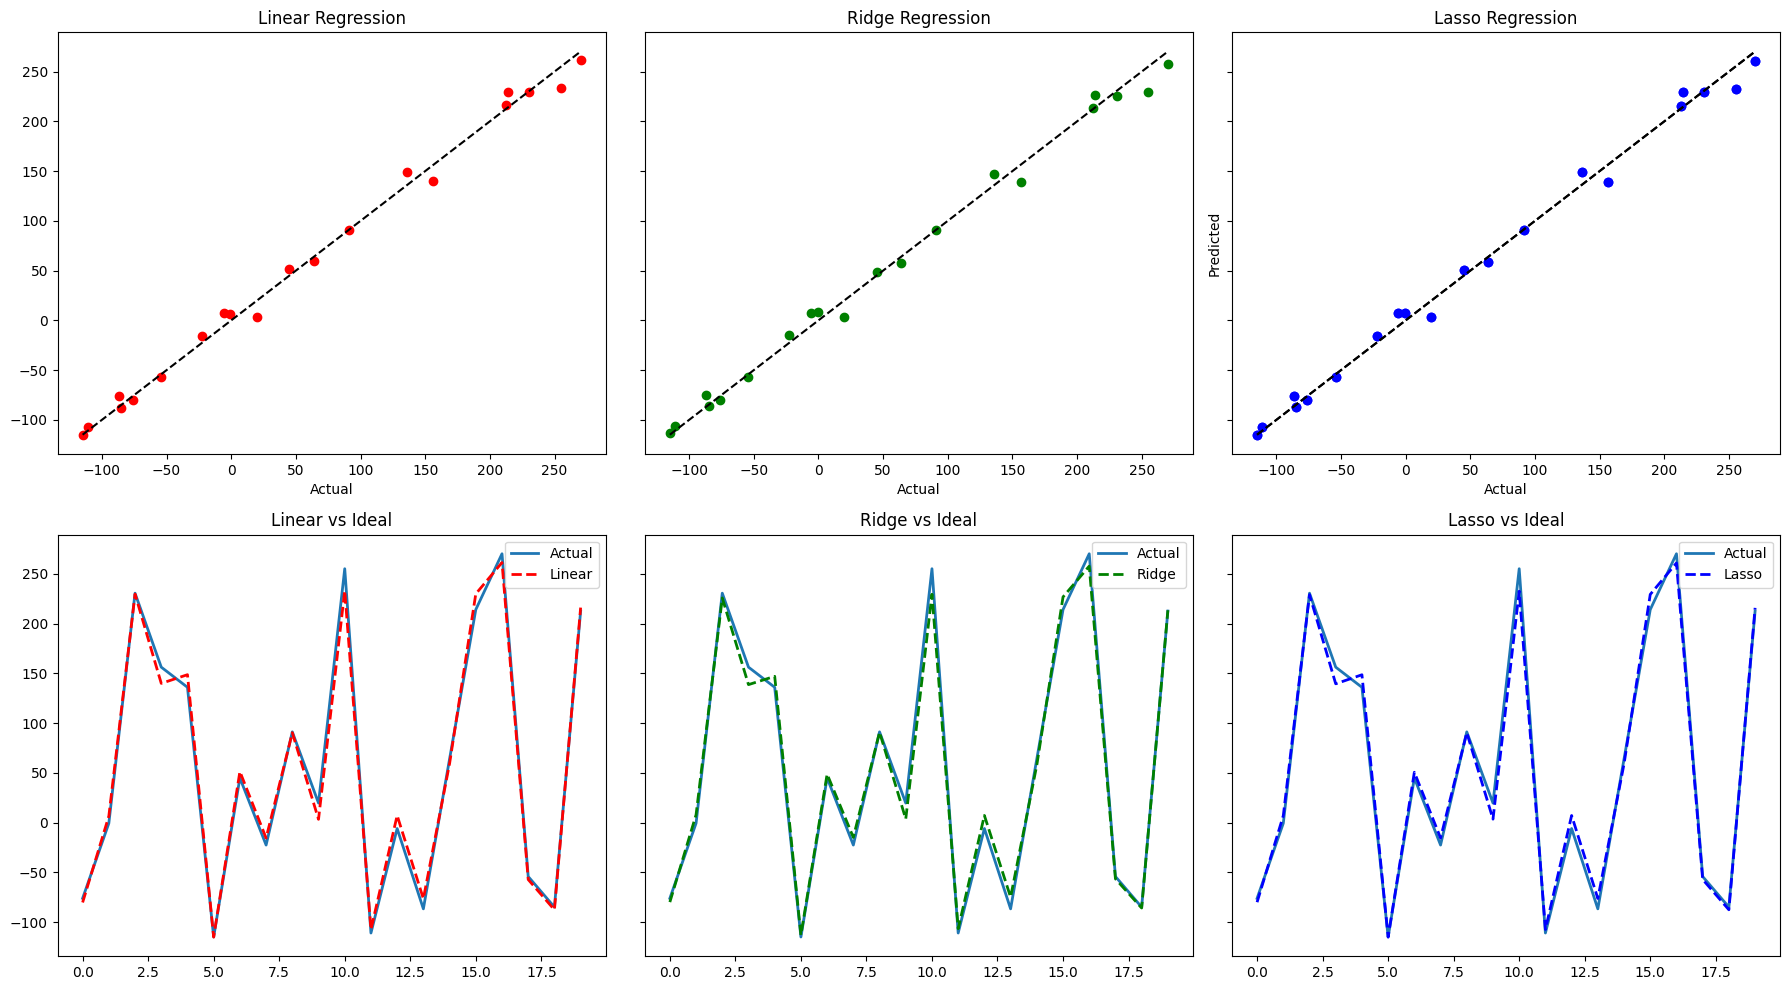

In [103]:
# Plot the predictions vs actuals 
fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharey=True)

axes[0,0].scatter(y_test, lin_pred, color="red", label="Linear")
axes[0,0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
axes[0,0].set_title("Linear Regression",)
axes[0,0].set_xlabel("Actual",)

axes[0,2].scatter(y_test, lasso_pred, color="blue", label="Lasso")
axes[0,2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
axes[0,2].set_title("Lasso Regression",)
axes[0,2].set_xlabel("Actual",)
axes[0,2].set_ylabel("Predicted",)

axes[0,1].scatter(y_test, ridge_pred, color="green", label="Ridge")
axes[0,1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
axes[0,1].set_title("Ridge Regression",)
axes[0,1].set_xlabel("Actual",)

axes[0,2].scatter(y_test, lasso_pred, color="blue", label="Lasso")
axes[0,2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
axes[0,2].set_title("Lasso Regression",)
axes[0,2].set_xlabel("Actual",)
axes[0,2].set_ylabel("Predicted",)

# Line plots for predictions compared to actual and ideal predictions
axes[1,0].plot(y_test, label="Actual", lw=2)
axes[1,0].plot(lin_pred, '--', lw=2, color='red', label="Linear")
axes[1,0].set_title("Linear vs Ideal",)
axes[1,0].legend()
 
axes[1,1].plot(y_test, label="Actual", lw=2)
axes[1,1].plot(ridge_pred, '--', lw=2, color='green', label="Ridge")
axes[1,1].set_title("Ridge vs Ideal",)
axes[1,1].legend()
 
axes[1,2].plot(y_test, label="Actual", lw=2)
axes[1,2].plot(lasso_pred, '--', lw=2, color='blue', label="Lasso")
axes[1,2].set_title("Lasso vs Ideal",)
axes[1,2].legend()

plt.tight_layout()
plt.show()
